Notice how increasing the number of layers increases the capacity of the classifier.  Source: https://cs231n.github.io/neural-networks-case-study/

* Try experimenting with weight decay regularization and different learning rates. You will find the formulas below. 

 



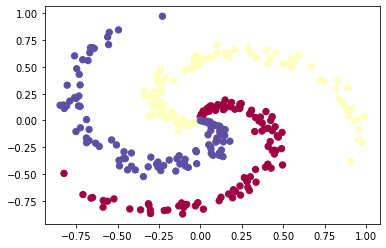

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [2]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

In [4]:
# compute class scores for a linear classifier
scores = np.dot(X, W) + b
scores

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.09002475e-05,  8.38258741e-05,  4.21641135e-05],
       [ 7.53723076e-05,  1.95717794e-04,  6.98287312e-05],
       [ 2.46750337e-04,  8.73396059e-05,  1.71455651e-04],
       [ 3.14218913e-04,  1.53294479e-04,  2.22681284e-04],
       [ 3.17737792e-04,  3.32825145e-04,  2.43537118e-04],
       [ 4.46968466e-04,  2.82909785e-04,  3.23455510e-04],
       [ 4.08052102e-04,  5.19944191e-04,  3.22314258e-04],
       [ 4.72346585e-04,  5.85822484e-04,  3.71442468e-04],
       [ 6.25214323e-04,  5.10534843e-04,  4.64301125e-04],
       [ 4.22556013e-04,  9.33971949e-04,  3.74617059e-04],
       [ 6.16040671e-04,  8.51236025e-04,  4.93444802e-04],
       [ 6.94630416e-04,  8.98093021e-04,  5.50019378e-04],
       [ 3.00365766e-04,  1.42620539e-03,  3.45009652e-04],
       [ 7.60313155e-04,  1.11435351e-03,  6.15590793e-04],
       [ 7.74420260e-04,  1.24418942e-03,  6.38285127e-04],
       [ 5.28068813e-04,  1.63269984e-03

In [11]:
X.shape[0]

300

In [5]:
num_examples = X.shape[0]
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [10]:
probs.shape

(300, 3)

In [7]:

probs[range(num_examples),y]

array([0.33333333, 0.33333065, 0.33332058, 0.33335941, 0.33336139,
       0.3333399 , 0.33336529, 0.33333043, 0.33333194, 0.33336396,
       0.33328183, 0.33332082, 0.33332679, 0.33320326, 0.33331007,
       0.33329625, 0.33321189, 0.33310205, 0.333214  , 0.33309067,
       0.33314611, 0.3331384 , 0.33303104, 0.33295491, 0.33315024,
       0.33304615, 0.3328928 , 0.33290627, 0.33292296, 0.33290945,
       0.33272293, 0.33271813, 0.33272321, 0.33261854, 0.33252939,
       0.33254693, 0.33255605, 0.33248921, 0.33243692, 0.33241847,
       0.33252091, 0.33237547, 0.33239432, 0.33240158, 0.33229919,
       0.33229072, 0.33225122, 0.3322443 , 0.33219841, 0.33217425,
       0.33215757, 0.33216192, 0.33213416, 0.33211057, 0.33210576,
       0.33204906, 0.33224818, 0.33212229, 0.3321333 , 0.33233984,
       0.33226528, 0.33204968, 0.33228787, 0.33227361, 0.3319196 ,
       0.33233796, 0.33215107, 0.33240028, 0.33222336, 0.3323584 ,
       0.332433  , 0.33218064, 0.33251161, 0.33226639, 0.33235

In [6]:
correct_logprobs = -np.log(probs[range(num_examples),y])


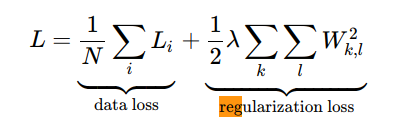

In [22]:
# compute the loss: average cross-entropy loss and regularization
reg = 10    ## reg represents the lambda parameter in the equation above 
           ### this lambda is also called the 'weight decay' coefficient for l2 regularization
           ### CHOOSE A VALUE BETWEEN 0 AND 1

data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss
loss

1.0998299441802821

In [ ]:
num_examples = X.shape[0]
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


In [ ]:
correct_logprobs = -np.log(probs[range(num_examples),y])
correct_logprobs

array([1.09861229, 1.09862628, 1.09864277, 1.09865834, 1.09867125,
       1.09868796, 1.09870436, 1.0987117 , 1.09873572, 1.0987513 ,
       1.09875592, 1.0987836 , 1.09874815, 1.09880727, 1.09881537,
       1.09882123, 1.09885878, 1.09887719, 1.09887485, 1.09882608,
       1.09886061, 1.09886254, 1.09889152, 1.09894008, 1.09888275,
       1.09867863, 1.09889244, 1.0988757 , 1.09893401, 1.09882668,
       1.09870688, 1.09874655, 1.09863214, 1.0987665 , 1.09878094,
       1.09871276, 1.09888715, 1.09875811, 1.09873693, 1.09884704,
       1.09868508, 1.09871305, 1.09886444, 1.0985239 , 1.09852751,
       1.09823147, 1.09856757, 1.09864632, 1.09870033, 1.09837952,
       1.09822007, 1.09814612, 1.09814133, 1.09836124, 1.09833695,
       1.09850249, 1.09808103, 1.09831202, 1.09796674, 1.09801246,
       1.09807108, 1.09826191, 1.09790543, 1.097916  , 1.09798518,
       1.09792369, 1.09781654, 1.09799119, 1.09767915, 1.09770754,
       1.09764237, 1.09758793, 1.09752349, 1.09748351, 1.09746

In [23]:
# compute the loss: average cross-entropy loss and regularization
data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss

In [24]:
dscores = probs
dscores[range(num_examples),y] -= 1
dscores /= num_examples

In [25]:
dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg*W # don't forget the regularization gradient

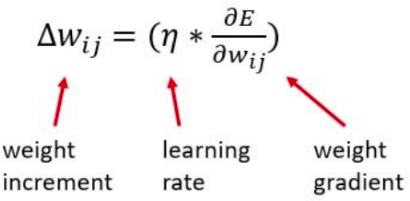

In [27]:
# perform a parameter update, with a given step size (aka the learning rate)
step_size = 0.01 ## Choose a value between 0 and 0.1 for the learning rate
W += -step_size * dW
b += -step_size * db

In [28]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some recommended hyperparameters
#step_size = 1e-0
#reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):

  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print(f"iteration {i}: loss {loss}")

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)

  dW += reg*W # regularization gradient

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.1120600743960918
iteration 10: loss 1.0988750018822502
iteration 20: loss 1.0972874017526828
iteration 30: loss 1.0970962351473184
iteration 40: loss 1.0970732142163182
iteration 50: loss 1.0970704403996985
iteration 60: loss 1.0970701047760285
iteration 70: loss 1.0970700628610914
iteration 80: loss 1.0970700564119664
iteration 90: loss 1.0970700543243335
iteration 100: loss 1.097070052846617
iteration 110: loss 1.0970700515215555
iteration 120: loss 1.0970700502889652
iteration 130: loss 1.0970700491368128
iteration 140: loss 1.0970700480591744
iteration 150: loss 1.0970700470511492
iteration 160: loss 1.0970700461082308
iteration 170: loss 1.0970700452262132
iteration 180: loss 1.0970700444011627
iteration 190: loss 1.0970700436294007


(-1.8722685409138484, 1.967731459086155)

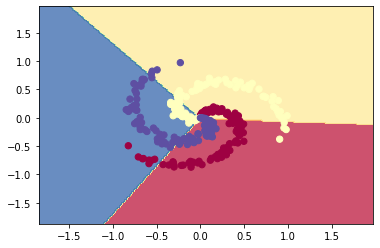

In [29]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [30]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
acc = (np.mean(predicted_class == y))
print(f"training accuracy: {acc}")

training accuracy: 0.5166666666666667


In [31]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

In [32]:
# evaluate class scores with a 2-layer Neural Network
hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
scores = np.dot(hidden_layer, W2) + b2

In [33]:
# backpropate the gradient to the parameters
# first backprop into parameters W2 and b2
dW2 = np.dot(hidden_layer.T, dscores)
db2 = np.sum(dscores, axis=0, keepdims=True)

In [34]:
dhidden = np.dot(dscores, W2.T)


In [35]:
# backprop the ReLU non-linearity
dhidden[hidden_layer <= 0] = 0

In [36]:
# finally into W,b
dW = np.dot(X.T, dhidden)
db = np.sum(dhidden, axis=0, keepdims=True)

In [37]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):

  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print(f"iteration {i} loss {loss}")

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)

  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0 loss 1.0985620948589538
iteration 1000 loss 0.311115849759488
iteration 2000 loss 0.2552585727510623
iteration 3000 loss 0.24878913630829053
iteration 4000 loss 0.2466667256894946
iteration 5000 loss 0.24592609945437088
iteration 6000 loss 0.2456416309174031
iteration 7000 loss 0.24552687251689453
iteration 8000 loss 0.24542569145508109
iteration 9000 loss 0.24538303920035326


In [38]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
acc = (np.mean(predicted_class == y))
print(f'training accuracy: {acc}') 

training accuracy: 0.9933333333333333


(-1.8722685409138484, 1.967731459086155)

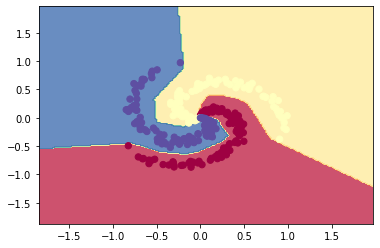

In [39]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
